<a href="https://colab.research.google.com/github/Balajinanda/Datascience-Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [2]:
# Necessary Libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Loading the data**

In [3]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path to the uploaded zip file and extraction directory
zip_file_path = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset.zip'
extract_dir = '/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [5]:
# List the contents of the extracted directory to explore its structure
PAMAP2_dataset_path = os.path.join(extract_dir, 'PAMAP2_Dataset')
dataset_contents = os.listdir(PAMAP2_dataset_path)
dataset_contents

['Protocol',
 'Optional',
 'subjectInformation.pdf',
 'DescriptionOfActivities.pdf',
 'DataCollectionProtocol.pdf',
 'PerformedActivitiesSummary.pdf',
 'readme.pdf']

In [6]:
# List the contents of the 'dataset' folder
dataset_folder_path = os.path.join(PAMAP2_dataset_path, 'Protocol')
dataset_files = os.listdir(dataset_folder_path)
dataset_files

['subject101.dat',
 'subject102.dat',
 'subject103.dat',
 'subject104.dat',
 'subject105.dat',
 'subject106.dat',
 'subject107.dat',
 'subject108.dat',
 'subject109.dat']

# **Dataset preparation**

In [7]:
# Path to the dataset directory
data_path = "/content/drive/MyDrive/HAR Balaji/PAMAP2_Dataset/PAMAP2_Dataset/Protocol"

# Define column names based on dataset documentation
columns = ['timestamp', 'activity_id', 'heart_rate'] + [
    # IMU1 (Hand)
    'hand_temperature',
    'hand_accel_16g_X', 'hand_accel_16g_Y', 'hand_accel_16g_Z',
    'hand_accel_6g_X', 'hand_accel_6g_Y', 'hand_accel_6g_Z',
    'hand_gyro_X', 'hand_gyro_Y', 'hand_gyro_Z',
    'hand_magnet_X', 'hand_magnet_Y', 'hand_magnet_Z',
    'hand_orientation_1', 'hand_orientation_2', 'hand_orientation_3', 'hand_orientation_4',
    # IMU2 (Chest)
    'chest_temperature',
    'chest_accel_16g_X', 'chest_accel_16g_Y', 'chest_accel_16g_Z',
    'chest_accel_6g_X', 'chest_accel_6g_Y', 'chest_accel_6g_Z',
    'chest_gyro_X', 'chest_gyro_Y', 'chest_gyro_Z',
    'chest_magnet_X', 'chest_magnet_Y', 'chest_magnet_Z',
    'chest_orientation_1', 'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
    # IMU3 (Ankle)
    'ankle_temperature',
    'ankle_accel_16g_X', 'ankle_accel_16g_Y', 'ankle_accel_16g_Z',
    'ankle_accel_6g_X', 'ankle_accel_6g_Y', 'ankle_accel_6g_Z',
    'ankle_gyro_X', 'ankle_gyro_Y', 'ankle_gyro_Z',
    'ankle_magnet_X', 'ankle_magnet_Y', 'ankle_magnet_Z',
    'ankle_orientation_1', 'ankle_orientation_2', 'ankle_orientation_3', 'ankle_orientation_4',
]

In [8]:
# Function to load and combine all .dat files
def load_and_combine_data(path):
    combined_data = []
    for file in os.listdir(path):
        if file.endswith(".dat"):
            subject_id = int(file.split('.')[0][-3:])  # Extract subject ID from file name
            file_path = os.path.join(path, file)
            subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
            subject_data['subject_id'] = subject_id  # Add subject ID column
            combined_data.append(subject_data)
    return pd.concat(combined_data, ignore_index=True)

# Load all data files
data = load_and_combine_data(data_path)

<ipython-input-8-988b175ed20e>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-8-988b175ed20e>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-8-988b175ed20e>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
<ipython-input-8-988b175ed20e>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subject_data = pd.rea

In [9]:
data.head()

,timestamp,activity_id,heart_rate,hand_temperature,hand_accel_16g_X,hand_accel_16g_Y,hand_accel_16g_Z,hand_accel_6g_X,hand_accel_6g_Y,hand_accel_6g_Z,...,ankle_gyro_Y,ankle_gyro_Z,ankle_magnet_X,ankle_magnet_Y,ankle_magnet_Z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


In [10]:
print("Combined Data Shape:", data.shape)

Combined Data Shape: (2872533, 55)


In [11]:
# Fill missing values with forward fill followed by backward fill
data = data.interpolate().fillna(method='bfill').fillna(method='ffill')

<ipython-input-11-d03360a9ba79>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate().fillna(method='bfill').fillna(method='ffill')


In [12]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 timestamp              0
activity_id            0
heart_rate             0
hand_temperature       0
hand_accel_16g_X       0
hand_accel_16g_Y       0
hand_accel_16g_Z       0
hand_accel_6g_X        0
hand_accel_6g_Y        0
hand_accel_6g_Z        0
hand_gyro_X            0
hand_gyro_Y            0
hand_gyro_Z            0
hand_magnet_X          0
hand_magnet_Y          0
hand_magnet_Z          0
hand_orientation_1     0
hand_orientation_2     0
hand_orientation_3     0
hand_orientation_4     0
chest_temperature      0
chest_accel_16g_X      0
chest_accel_16g_Y      0
chest_accel_16g_Z      0
chest_accel_6g_X       0
chest_accel_6g_Y       0
chest_accel_6g_Z       0
chest_gyro_X           0
chest_gyro_Y           0
chest_gyro_Z           0
chest_magnet_X         0
chest_magnet_Y         0
chest_magnet_Z         0
chest_orientation_1    0
chest_orientation_2    0
chest_orientation_3    0
chest_orientation_4    0
ankle_temperature      0
ankle_accel_16g_X      0
ankle_ac

In [13]:
sensor_columns = data.columns[3:-1]
scaler = MinMaxScaler()
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])

In [14]:
# Activity mapping from the README file
activity_map = {
    1: 'lying', 2: 'sitting', 3: 'standing', 4: 'walking',
    5: 'running', 6: 'cycling', 7: 'Nordic walking', 9: 'watching TV',
    10: 'computer work', 11: 'car driving', 12: 'ascending stairs',
    13: 'descending stairs', 16: 'vacuum cleaning', 17: 'ironing',
    18: 'folding laundry', 19: 'house cleaning', 20: 'playing soccer',
    24: 'rope jumping'
}
data['activity_name'] = data['activity_id'].map(activity_map)
print(data['activity_name'].value_counts())

activity_name
walking              238761
ironing              238690
lying                192523
standing             189931
Nordic walking       188107
sitting              185188
vacuum cleaning      175353
cycling              164600
ascending stairs     117216
descending stairs    104944
running               98199
rope jumping          49360
Name: count, dtype: int64


# **Exploratory Data Analysis(EDA)**

In [15]:
# Basic Data Overview
print("Columns:", data.columns)

Columns: Index(['timestamp', 'activity_id', 'heart_rate', 'hand_temperature',
       'hand_accel_16g_X', 'hand_accel_16g_Y', 'hand_accel_16g_Z',
       'hand_accel_6g_X', 'hand_accel_6g_Y', 'hand_accel_6g_Z', 'hand_gyro_X',
       'hand_gyro_Y', 'hand_gyro_Z', 'hand_magnet_X', 'hand_magnet_Y',
       'hand_magnet_Z', 'hand_orientation_1', 'hand_orientation_2',
       'hand_orientation_3', 'hand_orientation_4', 'chest_temperature',
       'chest_accel_16g_X', 'chest_accel_16g_Y', 'chest_accel_16g_Z',
       'chest_accel_6g_X', 'chest_accel_6g_Y', 'chest_accel_6g_Z',
       'chest_gyro_X', 'chest_gyro_Y', 'chest_gyro_Z', 'chest_magnet_X',
       'chest_magnet_Y', 'chest_magnet_Z', 'chest_orientation_1',
       'chest_orientation_2', 'chest_orientation_3', 'chest_orientation_4',
       'ankle_temperature', 'ankle_accel_16g_X', 'ankle_accel_16g_Y',
       'ankle_accel_16g_Z', 'ankle_accel_6g_X', 'ankle_accel_6g_Y',
       'ankle_accel_6g_Z', 'ankle_gyro_X', 'ankle_gyro_Y', 'ankle_gyro_Z',


In [16]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
          timestamp   activity_id    heart_rate  hand_temperature  \
count  2.872533e+06  2.872533e+06  2.872533e+06      2.872533e+06   
mean   1.834354e+03  5.466243e+00  1.098822e+02      7.346900e-01   
std    1.105689e+03  6.331333e+00  2.587853e+01      1.716669e-01   
min    5.640000e+00  0.000000e+00  5.700000e+01      0.000000e+00   
25%    8.931600e+02  0.000000e+00  9.000000e+01      6.220930e-01   
50%    1.790830e+03  3.000000e+00  1.080000e+02      7.790698e-01   
75%    2.710570e+03  7.000000e+00  1.254545e+02      8.604651e-01   
max    4.475630e+03  2.400000e+01  2.020000e+02      1.000000e+00   

       hand_accel_16g_X  hand_accel_16g_Y  hand_accel_16g_Z  hand_accel_6g_X  \
count      2.872533e+06      2.872533e+06      2.872533e+06     2.872533e+06   
mean       6.742471e-01      4.149587e-01      4.035947e-01     4.950500e-01   
std        2.877560e-02      2.417402e-02      1.481958e-02     5.248684e-02   
min        0.000000e+00      0.000000e

<ipython-input-17-cd898954cb12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_name', data=data, palette="viridis", order=data['activity_name'].value_counts().index)


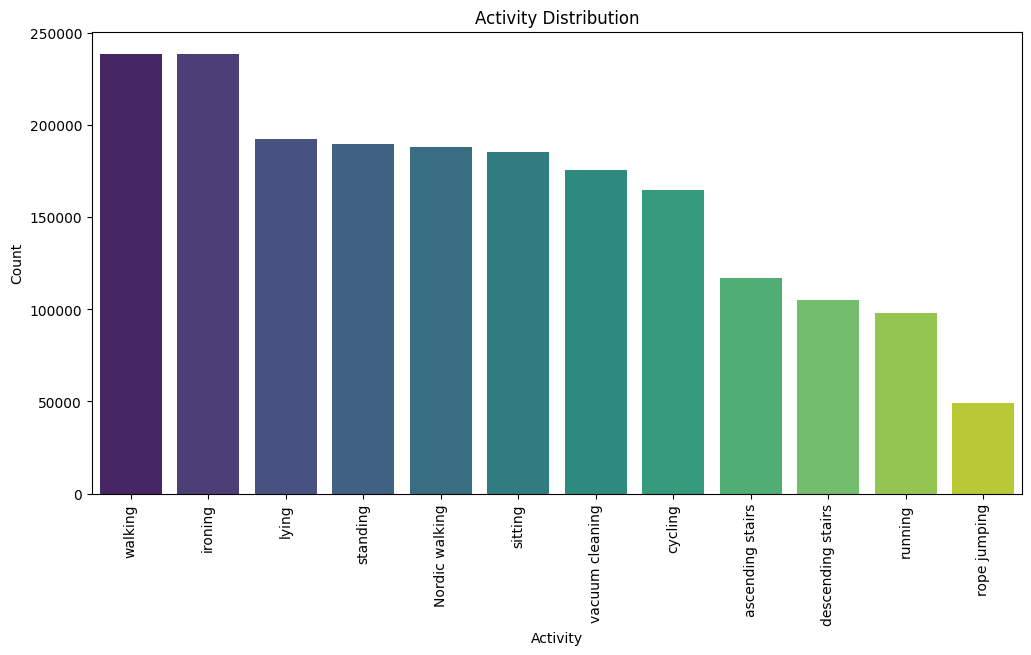

In [17]:
# Activity distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='activity_name', data=data, palette="viridis", order=data['activity_name'].value_counts().index)
plt.title("Activity Distribution")
plt.xticks(rotation=90)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.show()

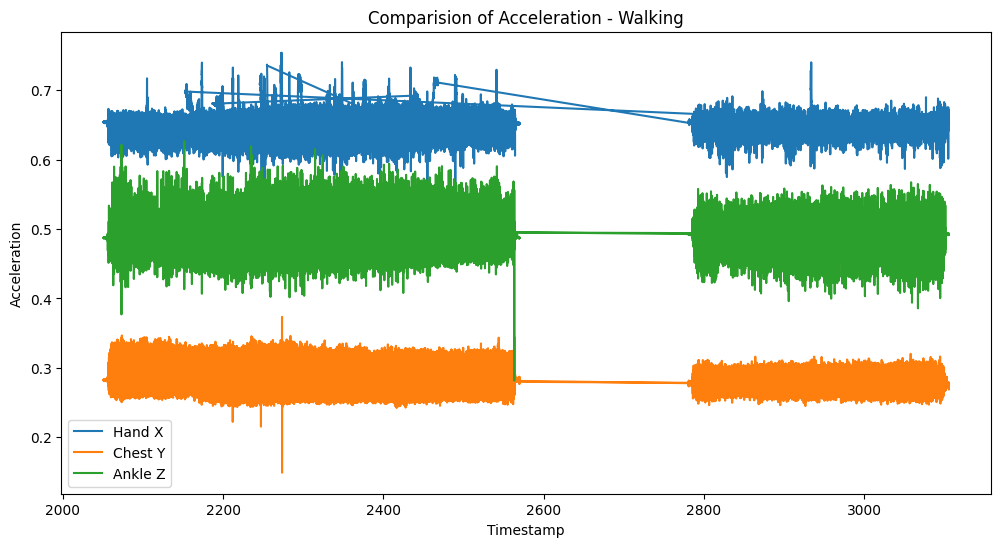

In [18]:
# Plot sensor readings for a specific activity (e.g., walking)
activity_data = data[data['activity_id'] == 4]
plt.figure(figsize=(12, 6))
plt.plot(activity_data['timestamp'], activity_data['hand_accel_16g_X'], label='Hand X')
plt.plot(activity_data['timestamp'], activity_data['chest_accel_16g_Y'], label='Chest Y')
plt.plot(activity_data['timestamp'], activity_data['ankle_accel_16g_Z'], label='Ankle Z')
plt.legend()
plt.title("Comparision of Acceleration - Walking")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.show()

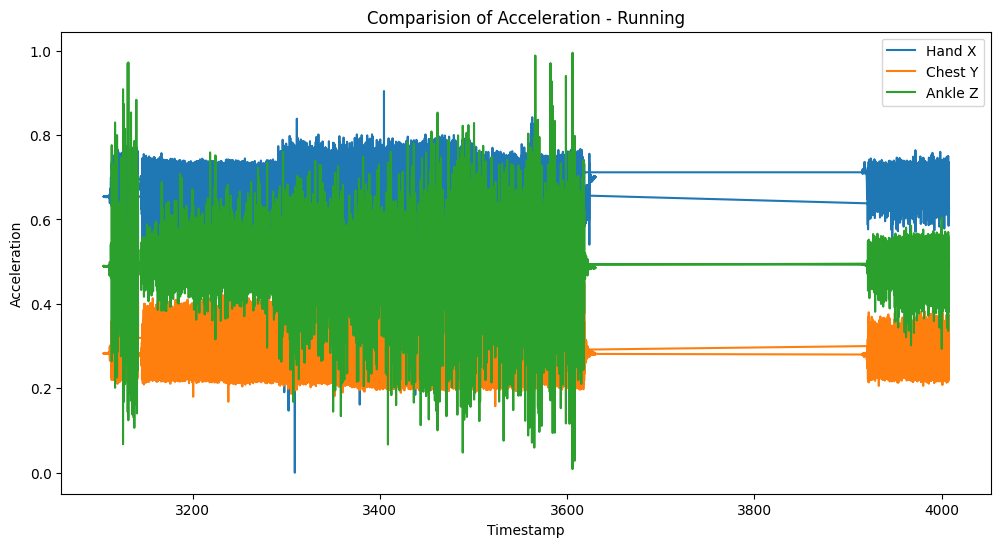

In [19]:
# Plot sensor readings for a specific activity (e.g., running)
activity_data = data[data['activity_id'] == 5]
plt.figure(figsize=(12, 6))
plt.plot(activity_data['timestamp'], activity_data['hand_accel_16g_X'], label='Hand X')
plt.plot(activity_data['timestamp'], activity_data['chest_accel_16g_Y'], label='Chest Y')
plt.plot(activity_data['timestamp'], activity_data['ankle_accel_16g_Z'], label='Ankle Z')
plt.legend()
plt.title("Comparision of Acceleration - Running")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.show()

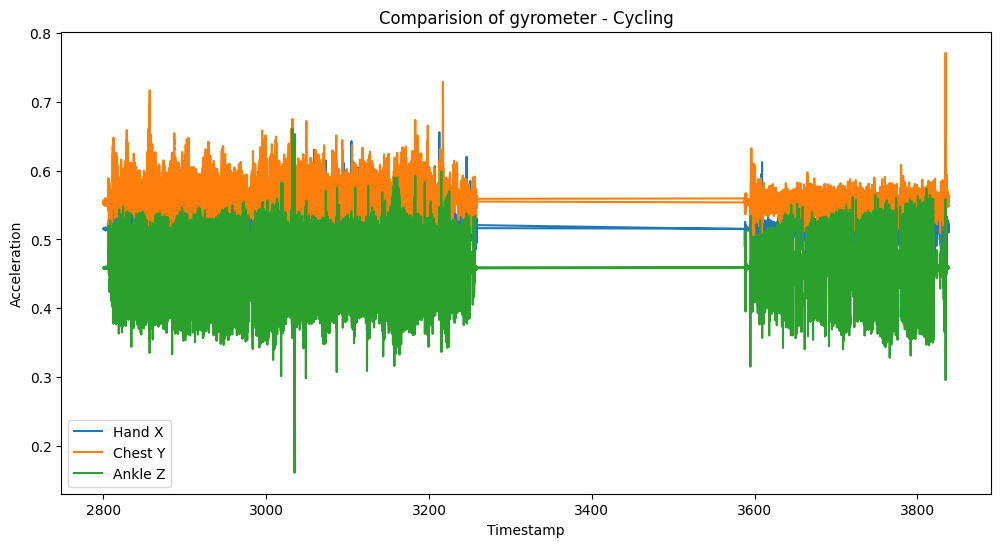

In [20]:
# Plot sensor readings for a specific activity (e.g., cycling)
activity_data = data[data['activity_id'] == 6]
plt.figure(figsize=(12, 6))
plt.plot(activity_data['timestamp'], activity_data['hand_gyro_X'], label='Hand X')
plt.plot(activity_data['timestamp'], activity_data['chest_gyro_Y'], label='Chest Y')
plt.plot(activity_data['timestamp'], activity_data['ankle_gyro_Z'], label='Ankle Z')
plt.legend()
plt.title("Comparision of gyrometer - Cycling")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.show()

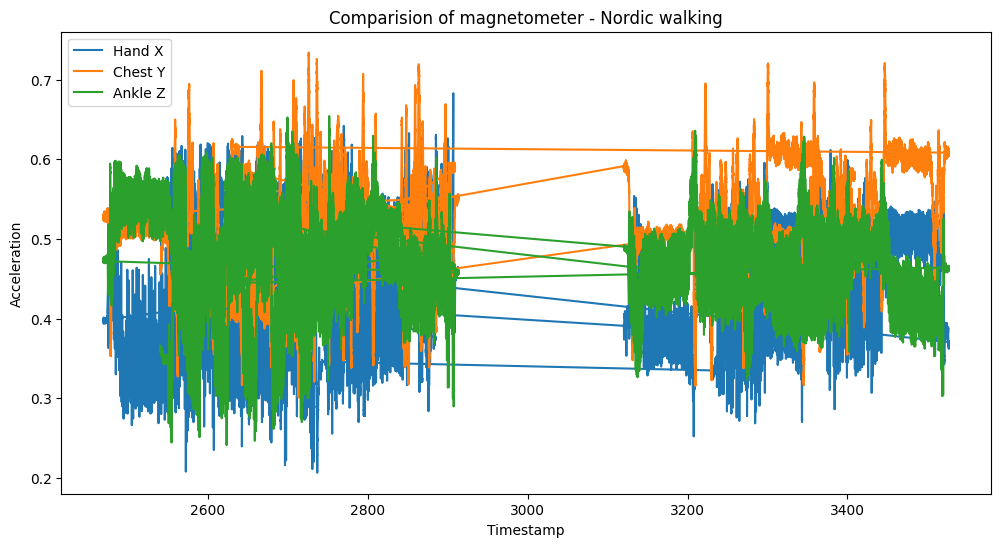

In [21]:
# Plot sensor readings for a specific activity (e.g., Nordic walking)
activity_data = data[data['activity_id'] == 7]
plt.figure(figsize=(12, 6))
plt.plot(activity_data['timestamp'], activity_data['hand_magnet_X'], label='Hand X')
plt.plot(activity_data['timestamp'], activity_data['chest_magnet_Y'], label='Chest Y')
plt.plot(activity_data['timestamp'], activity_data['ankle_magnet_Z'], label='Ankle Z')
plt.legend()
plt.title("Comparision of magnetometer - Nordic walking")
plt.xlabel("Timestamp")
plt.ylabel("Acceleration")
plt.show()

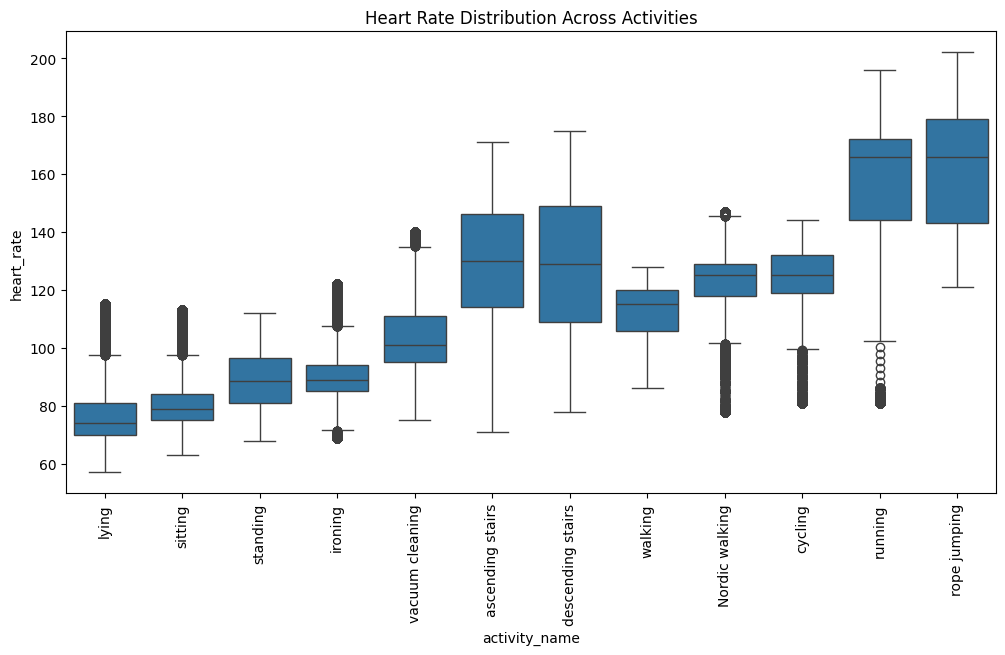

In [22]:
# Heart rate distribution by activity
plt.figure(figsize=(12, 6))
sns.boxplot(x='activity_name', y='heart_rate', data=data)
plt.title("Heart Rate Distribution Across Activities")
plt.xticks(rotation=90)
plt.show()

# **Feature Engineering**

In [23]:
def segment_data(data, window_size, step_size):
    segments, labels = [], []
    for i in range(0, len(data) - window_size, step_size):
        window = data.iloc[i:i + window_size]
        segments.append(window[sensor_columns].values)
        labels.append(window['activity_id'].mode()[0])  # Majority label
    return np.array(segments), np.array(labels)

# Segment parameters
WINDOW_SIZE = 100  # Adjust based on sampling rate (e.g., 100 samples ~ 1 sec)
STEP_SIZE = 50

X, y = segment_data(data, WINDOW_SIZE, STEP_SIZE)

In [24]:
from sklearn.model_selection import train_test_split

# Filter dataset to include only relevant activity IDs
valid_activities = list(activity_map.keys())  # Expected activity IDs
data = data[data['activity_id'].isin(valid_activities)]

# Re-split and preprocess the dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [25]:
def extract_features(segment):
    features = []
    for i in range(segment.shape[1]):  # Iterate over each sensor axis
        features += [np.mean(segment[:, i]), np.std(segment[:, i]), np.min(segment[:, i]), np.max(segment[:, i])]
    return features

# Generate features and labels
X_train_features = np.array([extract_features(segment) for segment in X_train])
X_val_features = np.array([extract_features(segment) for segment in X_val])
X_test_features = np.array([extract_features(segment) for segment in X_test])

# **Methodology**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode activity labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Update the number of classes
num_classes = len(label_encoder.classes_)
print("Number of classes after encoding:", num_classes)

# Convert to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

Number of classes after encoding: 13


## **1. CNN Model**

In [28]:
# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 64)              │           9,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413,069 (1.58 MB)

 Trainable params: 413,069 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
cnn_history = cnn_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=64
)

Epoch 1/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4168 - loss: 1.8408 - val_accuracy: 0.6498 - val_loss: 1.0389
Epoch 2/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6042 - loss: 1.1551 - val_accuracy: 0.7135 - val_loss: 0.8434
Epoch 3/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6555 - loss: 0.9994 - val_accuracy: 0.7389 - val_loss: 0.7786
Epoch 4/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6832 - loss: 0.9163 - val_accuracy: 0.7564 - val_loss: 0.7042
Epoch 5/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7015 - loss: 0.8625 - val_accuracy: 0.7439 - val_loss: 0.7227
Epoch 6/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7124 - loss: 0.8223 - val_accuracy: 0.7710 - val_loss: 0.6460
Epoch 7/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7297 - loss: 0.7827 - val_accuracy: 0.7879 - val_loss: 0.6102
Epoch 8/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7303 - loss: 0.7749 - val_accu

In [31]:
# Evaluate CNN
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test_cat)
print(f"CNN Test Accuracy: {cnn_test_accuracy}")
cnn_report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(cnn_model.predict(X_test), axis=1))
print("CNN Report:")
print(cnn_report)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.3718
CNN Test Accuracy: 0.868647038936615
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2789
           1       1.00      0.95      0.98       578
           2       0.99      0.95      0.97       556
           3       0.83      0.95      0.89       570
           4       0.81      0.91      0.86       716
           5       0.99      0.88      0.93       294
           6       0.98      0.94      0.96       494
           7       0.93      0.94      0.94       564
           8       0.86      0.50      0.63       352
           9       0.88      0.50      0.64       315
          10       0.89      0.74      0.81       526
          11       0.85      0.98      0.91       716
          12       0.95      0.83      0.88       148

    accuracy                           0.87      8618
   macro avg       0.91

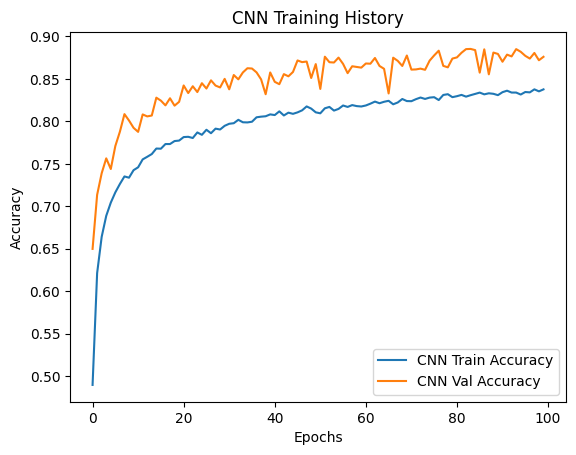

In [32]:
# Plot CNN accuracy
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.title('CNN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **2. ANN Model**

In [33]:
# Define the ANN model
ann_model = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Summary
ann_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 5100)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         652,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 13)                  │             845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 662,029 (2.53 MB)

 Trainable params: 662,029 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
ann_history = ann_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=64
)

Epoch 1/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2939 - loss: 2.4363 - val_accuracy: 0.3237 - val_loss: 2.2669
Epoch 2/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3211 - loss: 2.2818 - val_accuracy: 0.3237 - val_loss: 2.2664
Epoch 3/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3201 - loss: 2.2804 - val_accuracy: 0.3237 - val_loss: 2.2659
Epoch 4/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3190 - loss: 2.2817 - val_accuracy: 0.3237 - val_loss: 2.2660
Epoch 5/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3211 - loss: 2.2764 - val_accuracy: 0.3237 - val_loss: 2.2660
Epoch 6/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3197 - loss: 2.2780 - val_accuracy: 0.3237 - val_loss: 2.2660
Epoch 7/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3228 - loss: 2.2710 - val_accuracy: 0.3237 - val_loss: 2.2659
Epoch 8/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3234 - loss: 2.2721 - val_accu

In [36]:
# Evaluate ANN
ann_test_loss, ann_test_accuracy = ann_model.evaluate(X_test, y_test_cat)
print(f"ANN Test Accuracy: {ann_test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3213 - loss: 2.2706
ANN Test Accuracy: 0.32362496852874756


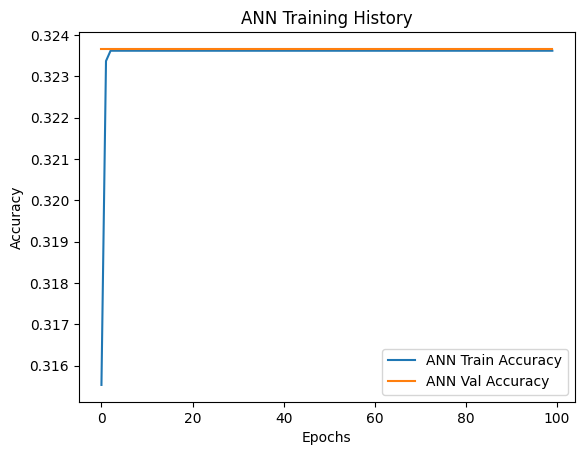

In [37]:
# Plot ANN accuracy
plt.plot(ann_history.history['accuracy'], label='ANN Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Val Accuracy')
plt.title('ANN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **3. MLP Model**

In [38]:
# Define the MLP model
mlp_model = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),  # Flatten input
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Summary
mlp_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 5100)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │       1,305,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,340,429 (5.11 MB)

 Trainable params: 1,340,429 (5.11 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the MLP model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Train the model
mlp_history = mlp_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=64
)

Epoch 1/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2903 - loss: 2.4254 - val_accuracy: 0.3240 - val_loss: 2.1549
Epoch 2/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3318 - loss: 2.1708 - val_accuracy: 0.3237 - val_loss: 2.0158
Epoch 3/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3307 - loss: 2.1353 - val_accuracy: 0.3235 - val_loss: 2.0331
Epoch 4/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3268 - loss: 2.1561 - val_accuracy: 0.3239 - val_loss: 1.9041
Epoch 5/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3242 - loss: 2.2025 - val_accuracy: 0.3237 - val_loss: 2.1238
Epoch 6/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3289 - loss: 2.1865 - val_accuracy: 0.3237 - val_loss: 2.0934
Epoch 7/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3332 - loss: 2.1794 - val_accuracy: 0.3238 - val_loss: 2.1276
Epoch 8/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3335 - loss: 2.1752 - val_accu

In [41]:
# Evaluate MLP
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test, y_test_cat)
print(f"MLP Test Accuracy: {mlp_test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3213 - loss: 2.2706
MLP Test Accuracy: 0.32362496852874756


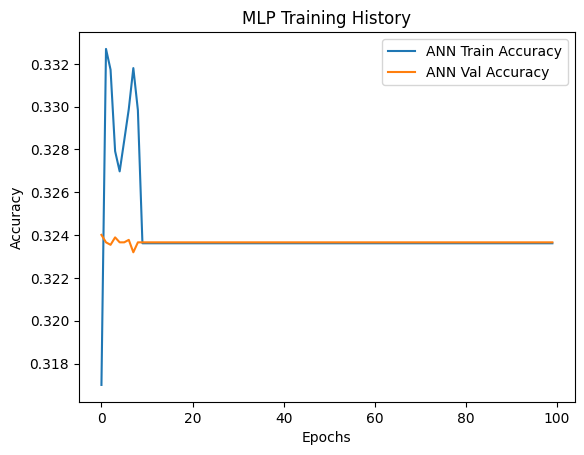

In [42]:
# Plot ANN accuracy
plt.plot(mlp_history.history['accuracy'], label='ANN Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='ANN Val Accuracy')
plt.title('MLP Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **4. RNN Model**

In [43]:
# Define the RNN model
rnn_model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Summary
rnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 100, 64)             │           7,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,677 (100.30 KB)

 Trainable params: 25,677 (100.30 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Train the model
rnn_history = rnn_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=64
)

Epoch 1/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.3691 - loss: 2.0092 - val_accuracy: 0.5138 - val_loss: 1.3685
Epoch 2/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5135 - loss: 1.4330 - val_accuracy: 0.5859 - val_loss: 1.1778
Epoch 3/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5791 - loss: 1.2445 - val_accuracy: 0.6337 - val_loss: 1.0280
Epoch 4/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.5646 - loss: 1.2971 - val_accuracy: 0.6343 - val_loss: 1.0414
Epoch 5/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.6080 - loss: 1.1450 - val_accuracy: 0.6503 - val_loss: 1.0053
Epoch 6/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6323 - loss: 1.0659 - val_accuracy: 0.6635 - val_loss: 0.9403
Epoch 7/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6364 - loss: 1.0681 - val_accuracy: 0.7110 - val_loss: 0.8320
Epoch 8/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6588 - loss: 1

In [46]:
# Evaluate RNN
rnn_report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(rnn_model.predict(X_test), axis=1))
print("RNN Report:")
print(rnn_report)
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test, y_test_cat)
print(f"RNN Test Accuracy: {rnn_test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
RNN Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.66      2789
           1       1.00      0.94      0.97       578
           2       0.87      0.92      0.89       556
           3       0.73      0.73      0.73       570
           4       0.57      0.55      0.56       716
           5       0.00      0.00      0.00       294
           6       0.92      0.93      0.92       494
           7       0.73      0.37      0.49       564
           8       0.00      0.00      0.00       352
           9       0.00      0.00      0.00       315
          10       0.67      0.54      0.60       526
          11       0.58      0.98      0.73       716
          12       0.72      0.21      0.32       148

    accuracy                           0.66      8618
   macro avg       0.57      0.53      0.53      8618
weighted avg       0.61      0.66      0.62      8618



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6660 - loss: 0.9485
RNN Test Accuracy: 0.6640751957893372


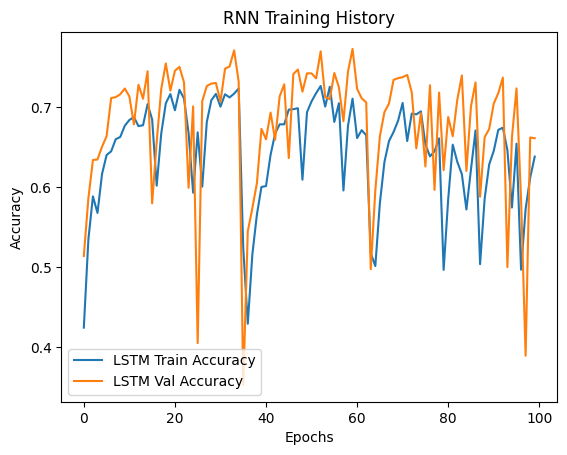

In [47]:
# Plot LSTM accuracy
plt.plot(rnn_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='LSTM Val Accuracy')
plt.title('RNN Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **5. LSTM Model**

In [48]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Summary
lstm_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 64)             │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,717 (284.05 KB)

 Trainable params: 72,717 (284.05 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
# Train the model
lstm_history = lstm_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=64
)

Epoch 1/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.3593 - loss: 2.0896 - val_accuracy: 0.5520 - val_loss: 1.3702
Epoch 2/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5286 - loss: 1.3912 - val_accuracy: 0.6260 - val_loss: 1.0261
Epoch 3/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6165 - loss: 1.1271 - val_accuracy: 0.6855 - val_loss: 0.8795
Epoch 4/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6419 - loss: 1.0521 - val_accuracy: 0.7122 - val_loss: 0.8255
Epoch 5/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6849 - loss: 0.9151 - val_accuracy: 0.7189 - val_loss: 0.7866
Epoch 6/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6782 - loss: 0.9482 - val_accuracy: 0.7244 - val_loss: 0.7549
Epoch 7/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7230 - loss: 0.8183 - val_accuracy: 0.7229 - val_loss: 0.7703
Epoch 8/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7355 - loss: 0.7852 -

In [51]:
# Evaluate LSTM
lstm_test_loss, lstm_test_accuracy = lstm_model.evaluate(X_test, y_test_cat)
print(f"LSTM Test Accuracy: {lstm_test_accuracy}")
lstm_report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(lstm_model.predict(X_test), axis=1))
print("LSTM Report:")
print(lstm_report)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9238 - loss: 0.2207
LSTM Test Accuracy: 0.9277094602584839
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2789
           1       1.00      0.96      0.98       578
           2       0.98      0.98      0.98       556
           3       0.92      0.99      0.96       570
           4       0.98      0.93      0.95       716
           5       0.99      0.96      0.98       294
           6       0.99      0.96      0.98       494
           7       0.95      0.99      0.97       564
           8       0.76      0.82      0.79       352
           9       0.94      0.73      0.82       315
          10       0.85      0.92      0.89       526
          11       0.95      0.97      0.96       716
          12       0.95      0.86      0.90       148

    accuracy                           0.93      8618
   macro avg       0

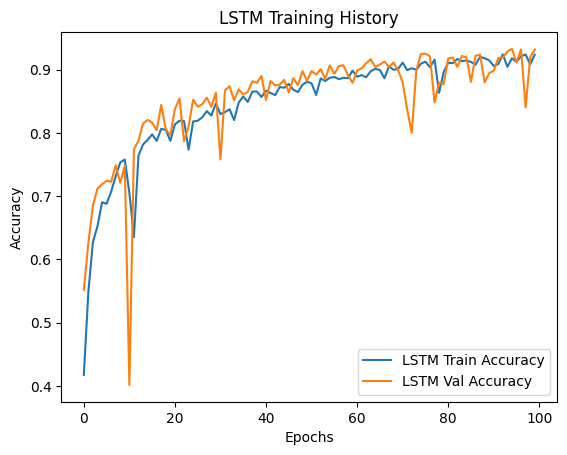

In [52]:
# Plot LSTM accuracy
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Val Accuracy')
plt.title('LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **6. GRU Model**

In [53]:
# Define the GRU model
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    GRU(64),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Summary
gru_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 100, 64)             │          22,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,421 (224.30 KB)

 Trainable params: 57,421 (224.30 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compile the GRU model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Train the model
gru_history = gru_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=64
)

Epoch 1/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3694 - loss: 2.0168 - val_accuracy: 0.6011 - val_loss: 1.1501
Epoch 2/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5734 - loss: 1.2451 - val_accuracy: 0.6820 - val_loss: 0.9462
Epoch 3/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6390 - loss: 1.0511 - val_accuracy: 0.7027 - val_loss: 0.8556
Epoch 4/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6811 - loss: 0.9334 - val_accuracy: 0.7388 - val_loss: 0.7583
Epoch 5/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7011 - loss: 0.8793 - val_accuracy: 0.7652 - val_loss: 0.6915
Epoch 6/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7250 - loss: 0.8221 - val_accuracy: 0.7402 - val_loss: 0.7486
Epoch 7/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7311 - loss: 0.8044 - val_accuracy: 0.7572 - val_loss: 0.7011
Epoch 8/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7599 - loss: 0.7292 - 

In [56]:
# Evaluate GRU
gru_test_loss, gru_test_accuracy = gru_model.evaluate(X_test, y_test_cat)
print(f"GRU Test Accuracy: {gru_test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9245 - loss: 0.2166
GRU Test Accuracy: 0.9265490770339966


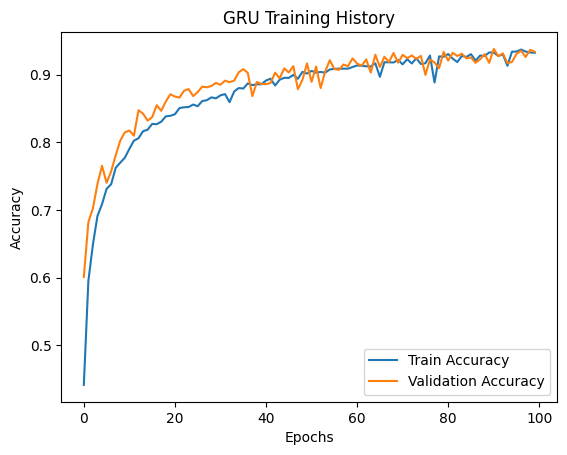

In [57]:
# Plot accuracy
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('GRU Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **7. Hybrid CNN-LSTM Model**

In [58]:
# Define the CNN-LSTM hybrid model
cnn_lstm_model = Sequential([
    # CNN layers
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),

    # LSTM layers
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dropout(0.5),

    # Dense layers for classification
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Summary
cnn_lstm_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 98, 64)              │           9,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 49, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,901 (335.55 KB)

 Trainable params: 85,901 (335.55 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
# Train the model
cnn_lstm_history = cnn_lstm_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=64
)

Epoch 1/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3606 - loss: 2.0985 - val_accuracy: 0.4989 - val_loss: 1.5074
Epoch 2/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5199 - loss: 1.4521 - val_accuracy: 0.6327 - val_loss: 1.0903
Epoch 3/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6048 - loss: 1.1881 - val_accuracy: 0.6536 - val_loss: 1.0145
Epoch 4/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6401 - loss: 1.0869 - val_accuracy: 0.6754 - val_loss: 0.9795
Epoch 5/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6612 - loss: 1.0072 - val_accuracy: 0.7092 - val_loss: 0.8351
Epoch 6/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6919 - loss: 0.9133 - val_accuracy: 0.7060 - val_loss: 0.8837
Epoch 7/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7014 - loss: 0.8909 - val_accuracy: 0.7371 - val_loss: 0.7324
Epoch 8/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7251 - loss: 0.8165 - val_acc

In [61]:
# Evaluate CNN-LSTM
cnn_lstm_test_loss, cnn_lstm_test_accuracy = cnn_lstm_model.evaluate(X_test, y_test_cat)
print(f"CNN-LSTM Test Accuracy: {cnn_lstm_test_accuracy}")
cnn_lstm_report = classification_report(np.argmax(y_test_cat, axis=1), np.argmax(cnn_lstm_model.predict(X_test), axis=1))
print("CNN-LSTM Report:")
print(cnn_lstm_report)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8658 - loss: 0.3673
CNN-LSTM Test Accuracy: 0.869111180305481
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN-LSTM Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2789
           1       0.97      0.97      0.97       578
           2       0.96      0.98      0.97       556
           3       0.91      0.97      0.94       570
           4       0.98      0.79      0.88       716
           5       0.90      0.81      0.85       294
           6       0.96      0.95      0.95       494
           7       0.97      0.77      0.86       564
           8       0.79      0.59      0.67       352
           9       0.84      0.57      0.68       315
          10       0.82      0.92      0.87       526
          11       0.88      0.97      0.92       716
          12       1.00      0.66      0.80       148

    accuracy                           0.87      8618
   macro avg 

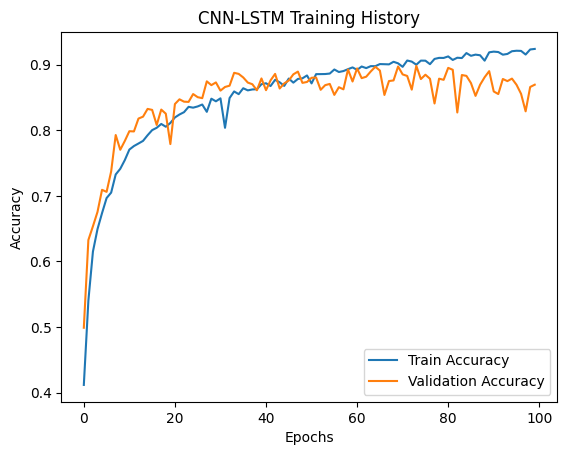

In [62]:
# Plot accuracy
plt.plot(cnn_lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Comparision of models performance**

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Helper function for metrics
def calculate_nn_metrics(model, X_test, y_test_cat):
    y_test_pred = np.argmax(model.predict(X_test), axis=1)  # Predicted classes
    y_test_true = np.argmax(y_test_cat, axis=1)  # True classes
    return {
        'Accuracy': accuracy_score(y_test_true, y_test_pred),
        'Precision': precision_score(y_test_true, y_test_pred, average='weighted'),
        'Recall': recall_score(y_test_true, y_test_pred, average='weighted'),
        'F1-Score': f1_score(y_test_true, y_test_pred, average='weighted')
    }

In [64]:
# Calculate metrics
cnn_metrics = calculate_nn_metrics(cnn_model, X_test, y_test_cat)
ann_metrics = calculate_nn_metrics(ann_model, X_test, y_test_cat)
mlp_metrics = calculate_nn_metrics(mlp_model, X_test, y_test_cat)
rnn_metrics = calculate_nn_metrics(rnn_model, X_test, y_test_cat)
lstm_metrics = calculate_nn_metrics(lstm_model, X_test, y_test_cat)
gru_metrics = calculate_nn_metrics(gru_model, X_test, y_test_cat)
cnn_lstm_metrics = calculate_nn_metrics(cnn_lstm_model, X_test, y_test_cat)

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [65]:
# Create a DataFrame for performance metrics
metrics_df = pd.DataFrame([
    {'Model': 'CNN', **cnn_metrics},
    {'Model': 'ANN', **ann_metrics},
    {'Model': 'MLP', **mlp_metrics},
    {'Model': 'RNN', **rnn_metrics},
    {'Model': 'LSTM', **lstm_metrics},
    {'Model': 'CNN-LSTM', **cnn_lstm_metrics},
    {'Model': 'GRU', **gru_metrics},
])

# Display the metrics
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False)
print(metrics_df)

      Model  Accuracy  Precision    Recall  F1-Score
4      LSTM  0.927709   0.929353  0.927709  0.927651
6       GRU  0.926549   0.927248  0.926549  0.926638
5  CNN-LSTM  0.869111   0.875429  0.869111  0.867074
0       CNN  0.868647   0.873266  0.868647  0.865163
3       RNN  0.664075   0.607676  0.664075  0.620033
1       ANN  0.323625   0.104733  0.323625  0.158252
2       MLP  0.323625   0.104733  0.323625  0.158252


<ipython-input-66-100f26f81818>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(models, rotation=45, ha='right')
<ipython-input-66-100f26f81818>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(models, rotation=45, ha='right')
<ipython-input-66-100f26f81818>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(models, rotation=45, ha='right')
<ipython-input-66-100f26f81818>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(models, rotation=45, ha='right')


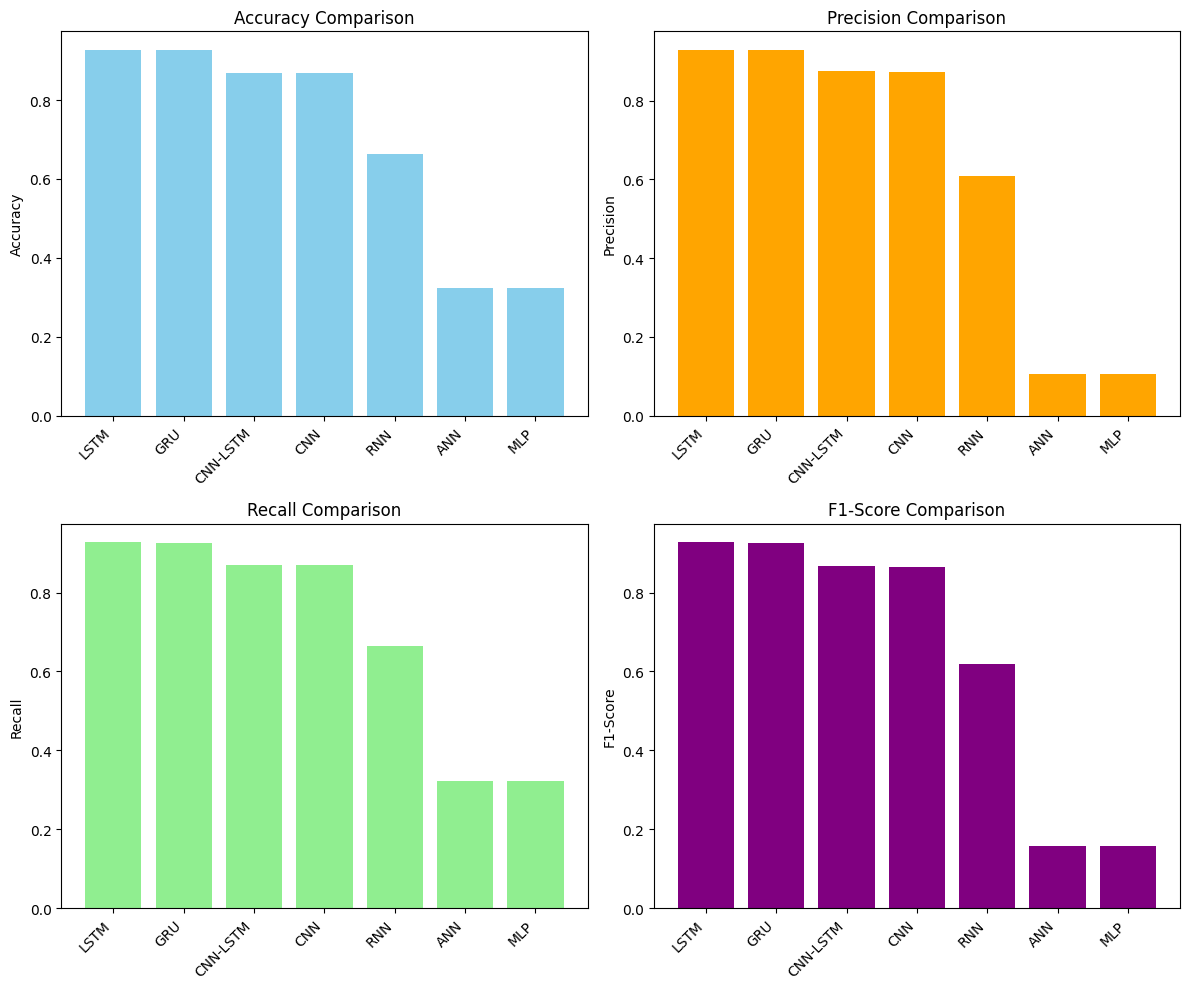

In [66]:
# Metrics for plotting
models = metrics_df['Model']
accuracy = metrics_df['Accuracy']
precision = metrics_df['Precision']
recall = metrics_df['Recall']
f1_score = metrics_df['F1-Score']

# Create a 2x2 plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy plot
axs[0, 0].bar(models, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy Comparison')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_xticklabels(models, rotation=45, ha='right')

# Precision plot
axs[0, 1].bar(models, precision, color='orange')
axs[0, 1].set_title('Precision Comparison')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_xticklabels(models, rotation=45, ha='right')

# Recall plot
axs[1, 0].bar(models, recall, color='lightgreen')
axs[1, 0].set_title('Recall Comparison')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_xticklabels(models, rotation=45, ha='right')

# F1-Score plot
axs[1, 1].bar(models, f1_score, color='purple')
axs[1, 1].set_title('F1-Score Comparison')
axs[1, 1].set_ylabel('F1-Score')
axs[1, 1].set_xticklabels(models, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

# **Hyperparameter tuning for the LSTM model**

In [67]:
import keras_tuner as kt
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

def build_lstm_model(hp):
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(
        units=hp.Int('units_layer1', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))

    # Second LSTM layer
    model.add(LSTM(
        units=hp.Int('units_layer2', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))

    # Dropout layer
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Fully connected Dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'
    ))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [85]:
tuner = kt.Hyperband(
    build_lstm_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='lstm_tuning',
    project_name='lstm_hyperparameter_tuning'
)


Reloading Tuner from lstm_tuning/lstm_hyperparameter_tuning/tuner0.json


In [86]:
tuner.search(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=50, batch_size=64)

In [87]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first LSTM layer is {best_hps.get('units_layer1')},
the optimal number of units in the second LSTM layer is {best_hps.get('units_layer2')},
the optimal dropout rate is {best_hps.get('dropout_rate')},
the optimal number of units in the dense layer is {best_hps.get('dense_units')},
and the best optimizer is {best_hps.get('optimizer')}.
""")


The optimal number of units in the first LSTM layer is 64,
the optimal number of units in the second LSTM layer is 128,
the optimal dropout rate is 0.30000000000000004,
the optimal number of units in the dense layer is 192,
and the best optimizer is adam.



In [88]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=64
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4316 - loss: 1.7521 - val_accuracy: 0.6583 - val_loss: 0.9976
Epoch 2/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6450 - loss: 1.0148 - val_accuracy: 0.7210 - val_loss: 0.8239
Epoch 3/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7012 - loss: 0.8543 - val_accuracy: 0.7319 - val_loss: 0.7774
Epoch 4/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7378 - loss: 0.7516 - val_accuracy: 0.7558 - val_loss: 0.6697
Epoch 5/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7613 - loss: 0.6839 - val_accuracy: 0.7850 - val_loss: 0.6135
Epoch 6/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7801 - loss: 0.6340 - val_accuracy: 0.7832 - val_loss: 0.6113
Epoch 7/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7768 - loss: 0.6438 - val_accuracy: 0.8136 - val_loss: 0.5520
Epoch 8/100
629/629 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8093 - loss: 0.5534 -

In [89]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test_cat)
print(f"Tuned LSTM Model Test Accuracy: {test_accuracy}")

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9429 - loss: 0.1660
Tuned LSTM Model Test Accuracy: 0.941865861415863


In [90]:
best_model.save('best_lstm_model.h5')

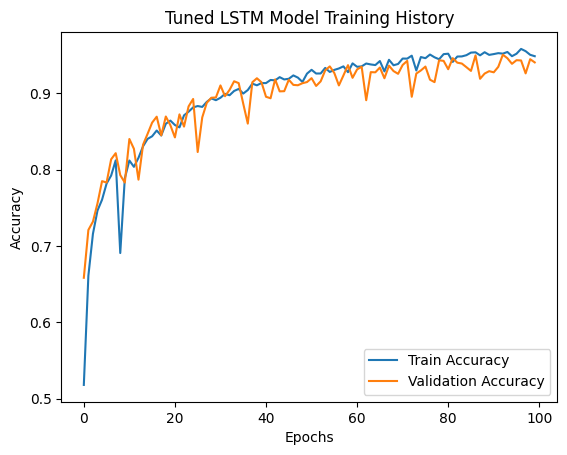

In [91]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Tuned LSTM Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [92]:
# Compare metrics
untuned_lstm_accuracy = 0.93
tuned_lstm_accuracy = 0.94

print(f"Accuracy Improvement: {untuned_lstm_accuracy - tuned_lstm_accuracy:.2%}")

Accuracy Improvement: -1.00%


# **Predictions**

In [93]:
from tensorflow.keras.models import load_model

# Load the saved tuned LSTM model
tuned_model = load_model('best_lstm_model.h5')  # Replace with your saved model file path

# Predict probabilities for each class
y_pred_probs = tuned_model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [94]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate predictions
print("Classification Report:")
print(classification_report(np.argmax(y_test_cat, axis=1), y_pred))

# Accuracy
accuracy = accuracy_score(np.argmax(y_test_cat, axis=1), y_pred)
print(f"Test Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2789
           1       0.97      0.97      0.97       578
           2       0.98      0.99      0.98       556
           3       0.97      0.96      0.97       570
           4       0.96      0.97      0.96       716
           5       0.99      0.96      0.98       294
           6       0.97      0.98      0.98       494
           7       0.95      0.98      0.97       564
           8       0.84      0.86      0.85       352
           9       0.91      0.83      0.87       315
          10       0.94      0.91      0.92       526
          11       0.95      0.98      0.97       716
          12       0.88      0.93      0.90       148

    accuracy                           0.94      8618
   macro avg       0.94      0.94      0.94      8618
weighted avg       0.94      0.94      0.94      8618

Test Accuracy: 0.9418658621489905


In [95]:
# Example: Predict for the first test instance
single_instance = X_test[0].reshape(1, X_test.shape[1], X_test.shape[2])  # Reshape for a single instance

# Predict
single_prediction = tuned_model.predict(single_instance)
predicted_label = np.argmax(single_prediction, axis=1)[0]

print(f"Predicted Activity Label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Activity Label: 6


In [96]:
print(f"Predicted Activity: {activity_map.get(predicted_label, 'Unknown')}")

Predicted Activity: cycling


In [97]:
# Save predictions and true labels
predictions_df = pd.DataFrame({
    'True Label': np.argmax(y_test_cat, axis=1),
    'Predicted Label': y_pred
})

# Save to a CSV file
predictions_df.to_csv('tuned_model_predictions.csv', index=False)
print("Predictions saved to 'tuned_model_predictions.csv'")

Predictions saved to 'tuned_model_predictions.csv'


In [98]:
# Extract heart rate data (assume it's one of the features in X_test)
heart_rate_index = 2
heart_rates = [X_test[i][:, heart_rate_index].mean() for i in range(5)]

# Get true and predicted labels
true_labels = np.argmax(y_test_cat, axis=1)
y_pred_probs = tuned_model.predict(X_test)
predicted_labels = np.argmax(y_pred_probs, axis=1)

# Create a DataFrame to compare
comparison_df = pd.DataFrame({
    'True Label': true_labels[:5],
    'Predicted Label': predicted_labels[:5],
    'Heart Rate (avg)': heart_rates
})

# Map numeric labels to activity names
comparison_df['True Activity'] = comparison_df['True Label'].map(activity_map)
comparison_df['Predicted Activity'] = comparison_df['Predicted Label'].map(activity_map)

# Print the comparison
print("First 5 Sensor Readings with True and Predicted Activities (Heart Rate Included):")
print(comparison_df[['Heart Rate (avg)', 'True Activity', 'Predicted Activity']])

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
First 5 Sensor Readings with True and Predicted Activities (Heart Rate Included):
   Heart Rate (avg) True Activity Predicted Activity
0          0.409395       cycling            cycling
1          0.410268   car driving        car driving
2          0.411384           NaN                NaN
3          0.437861       running            running
4          0.413428           NaN                NaN
